# 1.Define Business Case / Problem Statements.

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help theTexas state government  team to know the payroll information of employees of the state of Texas.  

Task 3:-
●	Who are the outliers in the salaries?
●	What departments/roles have the biggest wage disparities between managers and employees?
●	Have salaries and total compensations for some roles/ departments/ head-count changed over time?


# 2.Import Basic Libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import sweetviz as sv
import pickle


In [80]:
from pandas_profiling import ProfileReport
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from scipy import stats

# 3.Load Data

In [3]:
df = pd.read_csv("salary.csv")
df

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
0       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
1       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04454         4.0   
2       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
3       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04453         4.0   
4       CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
...                                          ...  ...       ...         ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...  12.93000        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000       

In [4]:
pd.set_option("display.max_columns", None)
df

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY DATE  HRLY RATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   
...                                          ...         ...        ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17    0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15    0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89    0.00000   
149480  CRP - CLASSIFIED REGULAR PA

In [5]:


# Overview Dataset

prof = ProfileReport(df)
prof.to_file(output_file='TexaSalPred.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4.Domain Analysis

# 5.Basic Checks

In [6]:
#To check number of rows and columns.
df.shape

(149481, 21)

In [7]:
# Print frist five rows

df.head()

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  \
0    02/18/88   75.96150        29.0  9545.82  114549.84        127717   
1    02/01/15   81.04454         4.0  1404.77   16857.24        127717   
2    02/01/20   75.96150        29.0  9545.82  114549.84         59115   
3    09/01/18   81.04453         4.0  1404.77   16857.24         59115   
4    06/29/20    0.00000        40.0  3284.27   39411.24        165030   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   
1       True                      NaN                    NaN   
2       True                      NaN                    NaN   
3       True                      NaN                    NaN   
4       True                      1.0                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN  
1                   NaN             True  
2             131407.08              NaN  
3                   NaN             True  
4                   NaN              NaN

In [8]:
#To check last five rows
df.tail()

AGENCY                                        AGENCY NAME  \
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY DATE  HRLY RATE  \
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17       0.00   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15       0.00   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12      12.93   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89       0.00   
149480  CRP - CLASSIFIED REGULAR PART-TIME          02/16/12      11.74   

        HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER duplicated  \
149476        40.0  2899.00  34788.00        770781        NaN   
149477        40.0  5500.00  66000.00        847431        NaN   
149478        20.0  1120.60  13447.20         34266        NaN   
149479        40.0  5744.16  68929.92        123490        NaN   
149480        20.0  1017.46  12209.52        103583        NaN   

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
149476                      NaN                    NaN                   NaN   
149477                      NaN                    NaN                   NaN   
149478                      NaN                    NaN                   NaN   
149479                      NaN                    NaN                   NaN   
149480                      NaN                    NaN                   NaN   

       hide_from_search  
149476              NaN  
149477              NaN  
149478              NaN  
149479              NaN  
149480              NaN

In [9]:
#To check random rows
df.sample(5)

AGENCY                                        AGENCY NAME  \
109050     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
145832     551  DEPARTMENT OF AGRICULTURE                     ...   
98581      644  TEXAS JUVENILE JUSTICE DEPARTMENT             ...   
80150      530  DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   
83268      537  DEPARTMENT OF STATE HEALTH SERVICES           ...   

                             LAST NAME                      FIRST NAME MI  \
109050  DYER                            JUSTIN                          H   
145832  WEIDENFELLER                    KEN                             A   
98581   GORDEN                          DEBRA                           W   
80150   WILBER                          JEFFREY                         L   
83268   SHUGART                         ROBERT                          A   

       CLASS CODE                                        CLASS TITLE  \
109050   8262      LAUNDRY MGR III                               ...   
145832   1621      DIRECTOR II                                   ...   
98581    0057      CLERK II                                      ...   
80150    1354      INVESTIGATOR V                                ...   
83268    1323      INSPECTOR III                                 ...   

              ETHNICITY           GENDER  \
109050  WHITE            MALE              
145832  WHITE            MALE              
98581   WHITE            FEMALE            
80150   WHITE            MALE              
83268   WHITE            MALE              

                                          STATUS EMPLOY DATE  HRLY RATE  \
109050  CRF - CLASSIFIED REGULAR FULL-TIME          02/25/13        0.0   
145832  CRF - CLASSIFIED REGULAR FULL-TIME          01/01/92        0.0   
98581   CRF - CLASSIFIED REGULAR FULL-TIME          03/15/18        0.0   
80150   CRF - CLASSIFIED REGULAR FULL-TIME          01/24/05        0.0   
83268   CRF - CLASSIFIED REGULAR FULL-TIME          09/08/15        0.0   

        HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER duplicated  \
109050        40.0  3720.17   44642.04        179219        NaN   
145832        40.0  8576.86  102922.32         55773        NaN   
98581         40.0  1981.75   23781.00       1112471        NaN   
80150         40.0  5081.38   60976.56         24261        NaN   
83268         40.0  3447.23   41366.76        858920        NaN   

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
109050                      NaN                    NaN                   NaN   
145832                      NaN                    NaN                   NaN   
98581                       NaN                    NaN                   NaN   
80150                       NaN                    NaN                   NaN   
83268                       NaN                    NaN                   NaN   

       hide_from_search  
109050              NaN  
145832              NaN  
98581               NaN  
80150               NaN  
83268               NaN

In [10]:
# Print all the columns

df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [11]:
# Check memory uses

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [12]:
# Statistical Analysis

df.describe().T

count           mean            std      min  \
AGENCY                   149481.0     545.736288     139.057691    101.0   
HRLY RATE                149481.0       0.346488       4.211485      0.0   
HRS PER WK               149481.0      39.714918       2.323855      1.0   
MONTHLY                  149481.0    4226.184248    2093.111691     50.0   
ANNUAL                   149481.0   50714.210973   25117.340292    600.0   
STATE NUMBER             149481.0  565193.023521  478621.220542      1.0   
multiple_full_time_jobs      14.0       1.000000       0.000000      1.0   
summed_annual_salary         16.0   74303.955000   51925.944282  18000.0   

                               25%        50%         75%           max  
AGENCY                      529.00     530.00      696.00  9.300000e+02  
HRLY RATE                     0.00       0.00        0.00  1.177885e+02  
HRS PER WK                   40.00      40.00       40.00  7.000000e+01  
MONTHLY                    3019.84    3720.17     4865.81  4.612500e+04  
ANNUAL                    36238.08   44642.04    58389.72  5.535000e+05  
STATE NUMBER             113334.00  346373.00  1100500.00  1.271604e+06  
multiple_full_time_jobs       1.00       1.00        1.00  1.000000e+00  
summed_annual_salary      32962.50   48063.30   123751.77  1.713834e+05

In [13]:
df.isnull().mean()*100 # Percentage of null values in the data

AGENCY                      0.000000
AGENCY NAME                 0.000000
LAST NAME                   0.000000
FIRST NAME                  0.000000
MI                          0.000000
CLASS CODE                  0.000000
CLASS TITLE                 0.000000
ETHNICITY                   0.000000
GENDER                      0.000000
STATUS                      0.000000
EMPLOY DATE                 0.000000
HRLY RATE                   0.000000
HRS PER WK                  0.000000
MONTHLY                     0.000000
ANNUAL                      0.000000
STATE NUMBER                0.000000
duplicated                 99.904336
multiple_full_time_jobs    99.990634
combined_multiple_jobs     99.935109
summed_annual_salary       99.989296
hide_from_search           99.989296
dtype: float64

In [14]:
#To check duplicated values

df.duplicated().sum()

0

In [15]:
#To take a backup of the dataset.
backup = df.copy()


In [16]:
# Featch numerical columns

num_col=df.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['AGENCY', 'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL',
       'STATE NUMBER', 'multiple_full_time_jobs', 'summed_annual_salary'],
      dtype='object')

In [17]:
# Featch categorical columns

cat_col=df.select_dtypes(include=['object'])
cat_col.columns

Index(['AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'duplicated', 'combined_multiple_jobs', 'hide_from_search'],
      dtype='object')

In [18]:
# find unique categories in dataset

for i in cat_col:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print('******************')

AGENCY NAME ['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '
 'HEALTH AND HUMAN SERVICES COMMISSION              '
 'DEPARTMENT OF AGRICULTURE                         '
 'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        '
 'SCHOOL FOR THE DEAF                               '
 'SENATE                                            '
 'LEGISLATIVE BUDGET BOARD                          '
 'HOUSE OF REPRESENTATIVES                          '
 'TEXAS FACILITIES COMMISSION                       '
 'STATE PRESERVATION BOARD                          '
 'TEXAS LEGISLAT

In [19]:
# find unique categories in dataset

for i in num_col:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print('******************')

AGENCY [241 212 696 302 601 510 520 537 530 529 551 771 772 101 104 102 303 809
 103 105 201 211 213 215 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 242 243 300 301 304 306 307 313 320 323 326 329 332 338 352 360
 401 403 405 407 448 452 454 455 457 458 459 460 464 469 473 479 481 503
 508 513 515 533 542 554 608 644 701 781 802 813 907 930 116 305 308 312
 327 347 356 359 362 364 409 411 450 451 456 466 475 476 477 504 507 514
 578 580 582 592 808]
AGENCY
529    36667
696    35926
601    13099
530    12588
405    10097
       ...  
364        7
481        5
213        4
464        4
510        1
Name: count, Length: 113, dtype: int64
******************
HRLY RATE [ 75.9615   81.04454  81.04453   0.       49.40717  28.58     25.
  17.33     13.13     11.5      20.00002  14.82693  30.16251  16.01272
  19.       67.30765  75.96     30.       16.17     13.5      52.
  30.87     82.635    30.1      17.00001  28.88     16.33     66.37
  17.00002  19.23     17.       33.66     46

# 6.Exploratory Data Analysis

***i).Univariate Analysis***

In [20]:
my_report = sv.analyze(df)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***ii).Bivariate Analysis***

In [21]:
num_col.columns

Index(['AGENCY', 'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL',
       'STATE NUMBER', 'multiple_full_time_jobs', 'summed_annual_salary'],
      dtype='object')

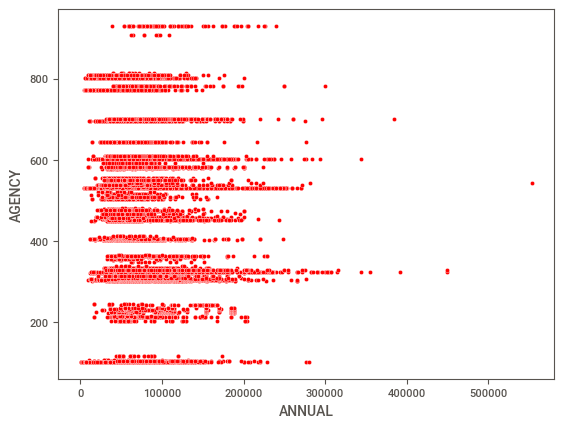

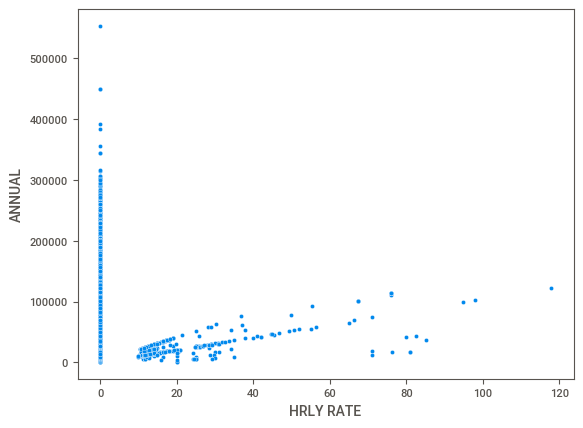

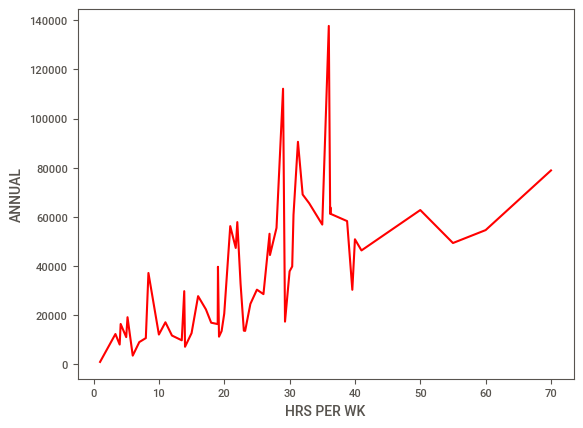

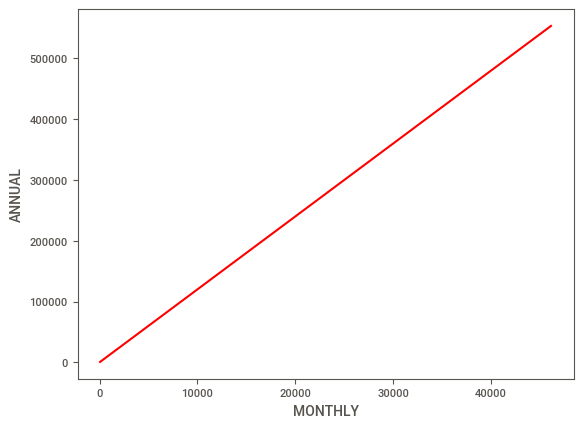

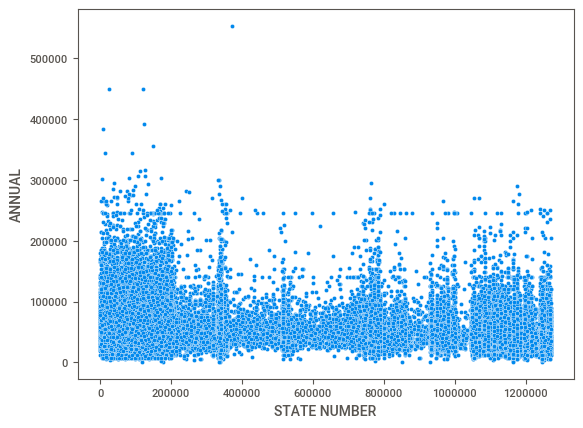

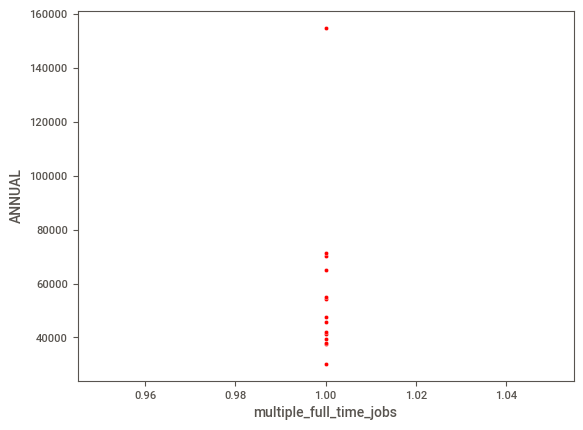

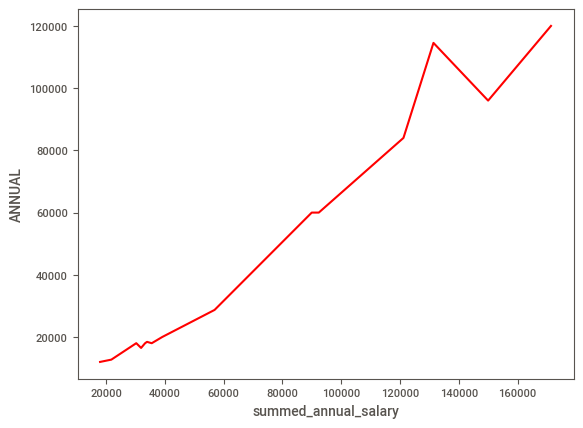

In [22]:
#Numerical columns

#Relation of AGENCY and ANNUAL
sns.scatterplot(data=df,x='ANNUAL',y='AGENCY',color='red') 
plt.show()


#Relation of HRLY RATE and ANNUAL
sns.scatterplot(data=df,x='HRLY RATE',y='ANNUAL') 
plt.show()


#Relation of HRS PER WK and ANNUAL
sns.lineplot(data=df,x='HRS PER WK',y='ANNUAL',color='red',ci=None) 
plt.show()


#Relation of AGENCY and MONTHLY
sns.lineplot(data=df,x='MONTHLY',y='ANNUAL',color='red',ci=None) 
plt.show()


#Relation of AGENCY and STATE NUMBER
sns.scatterplot(data=df,x='STATE NUMBER',y='ANNUAL') 
plt.show()


#Relation of AGENCY and multiple_full_time_jobs
sns.scatterplot(data=df,x='multiple_full_time_jobs',y='ANNUAL',color='red') 
plt.show()


#Relation of AGENCY and summed_annual_salary
sns.lineplot(data=df,x='summed_annual_salary',y='ANNUAL',color='red',ci=None) 
plt.show()

In [23]:
cat_col.columns

Index(['AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'duplicated', 'combined_multiple_jobs', 'hide_from_search'],
      dtype='object')

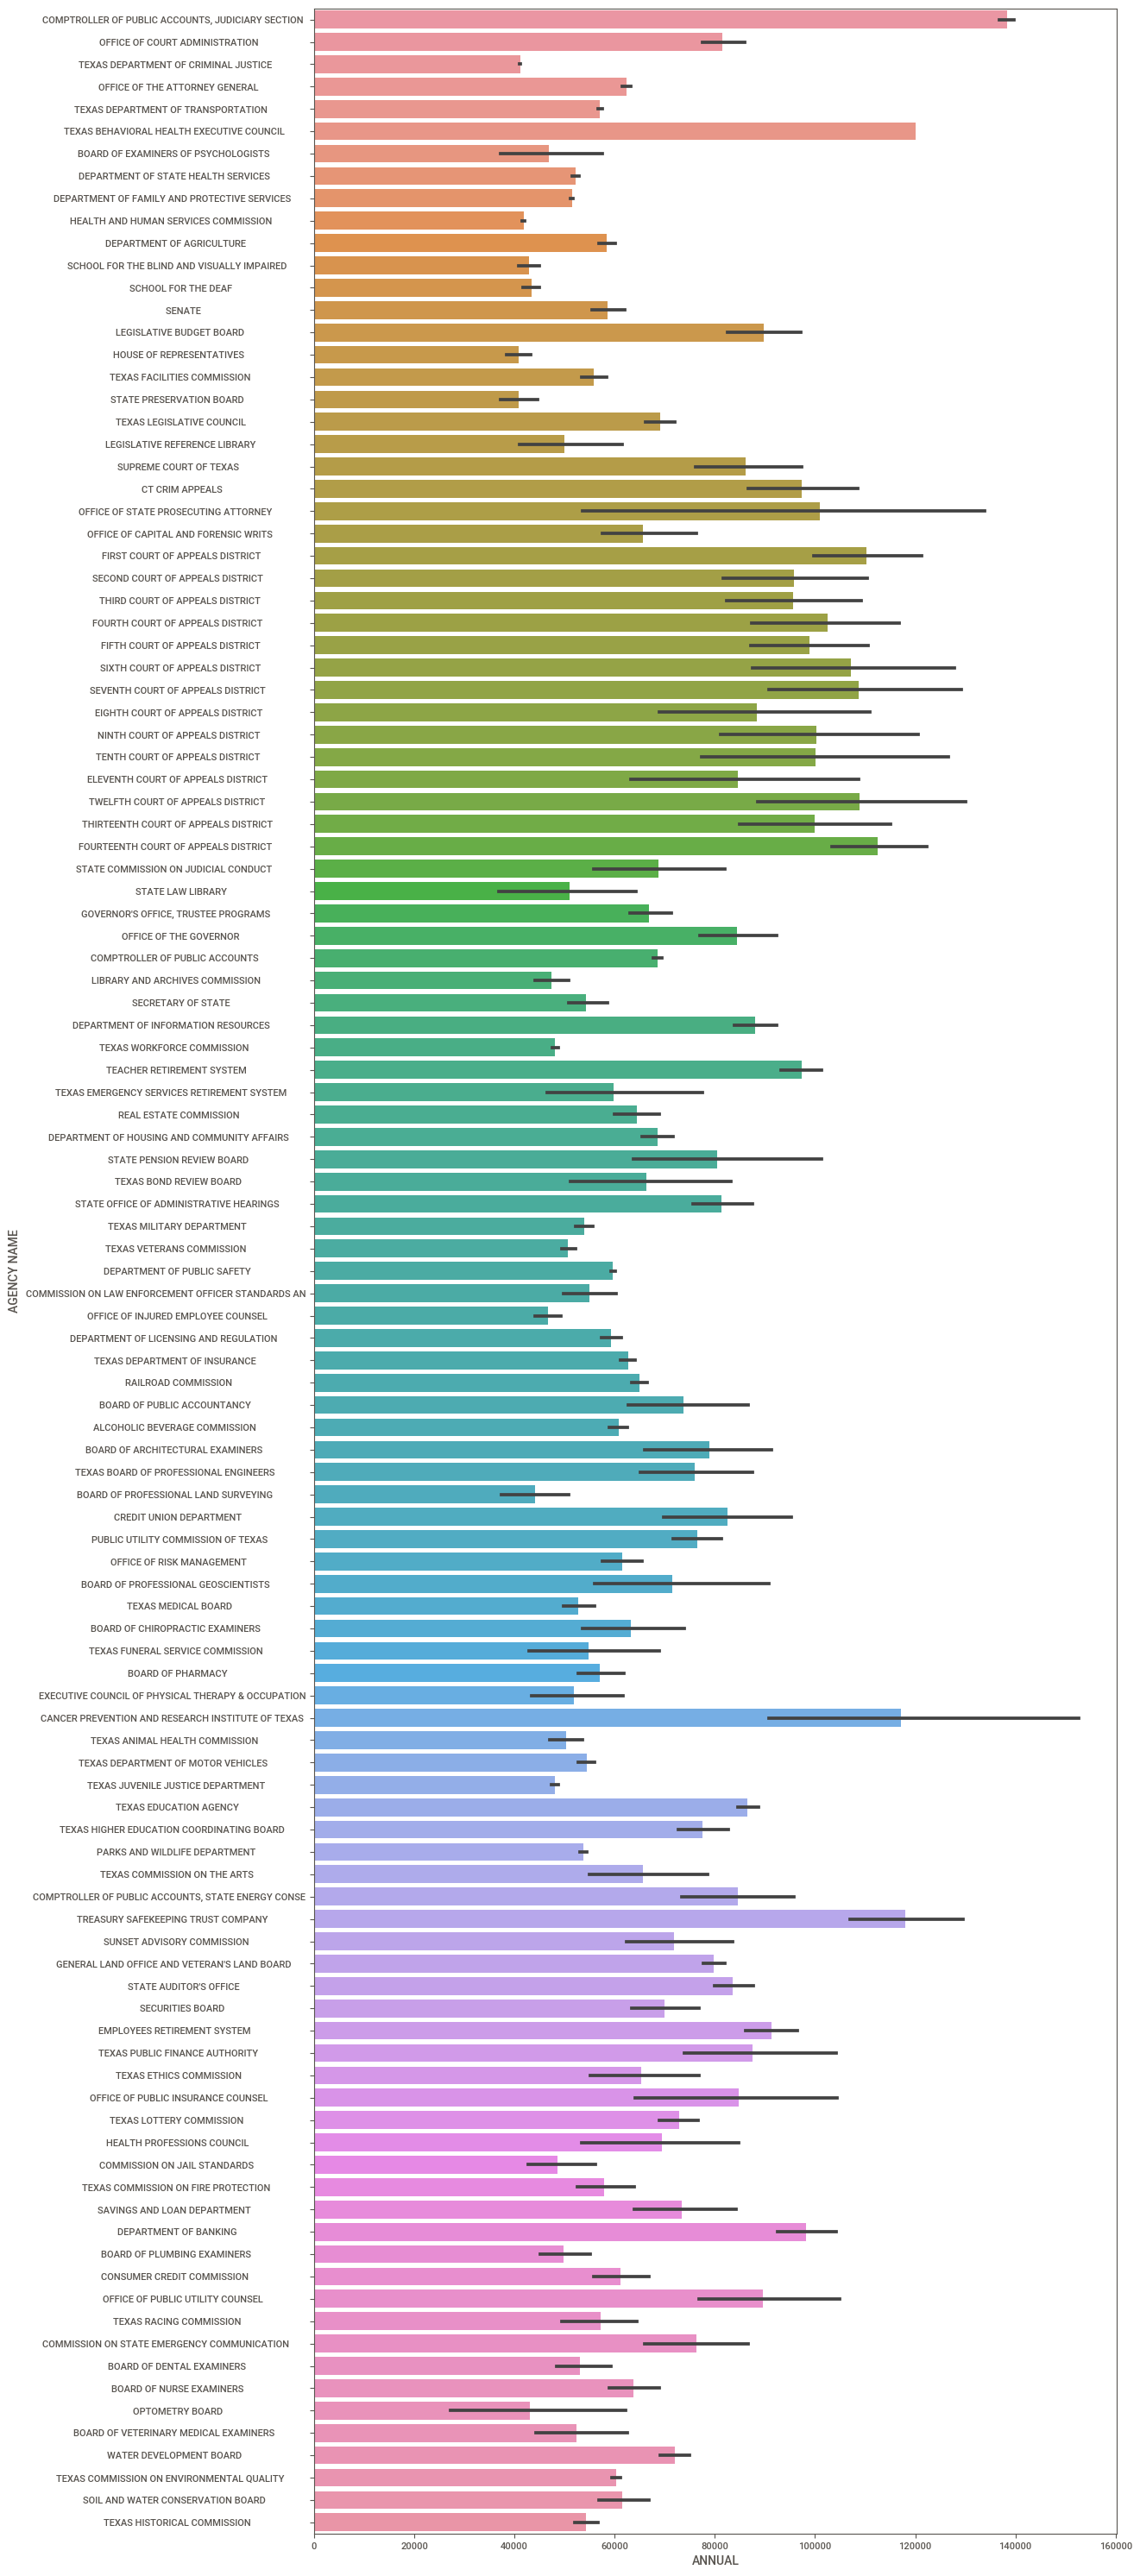

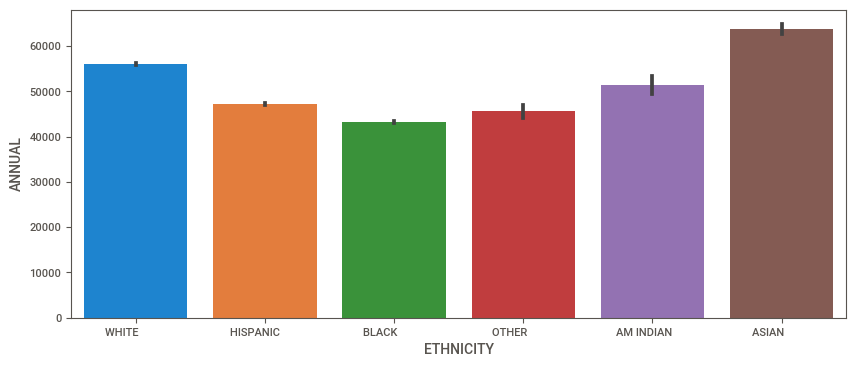

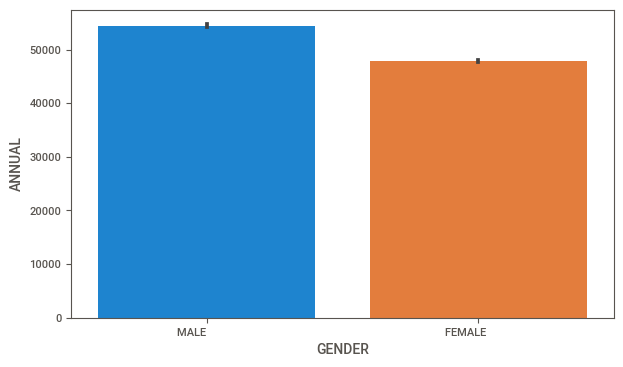

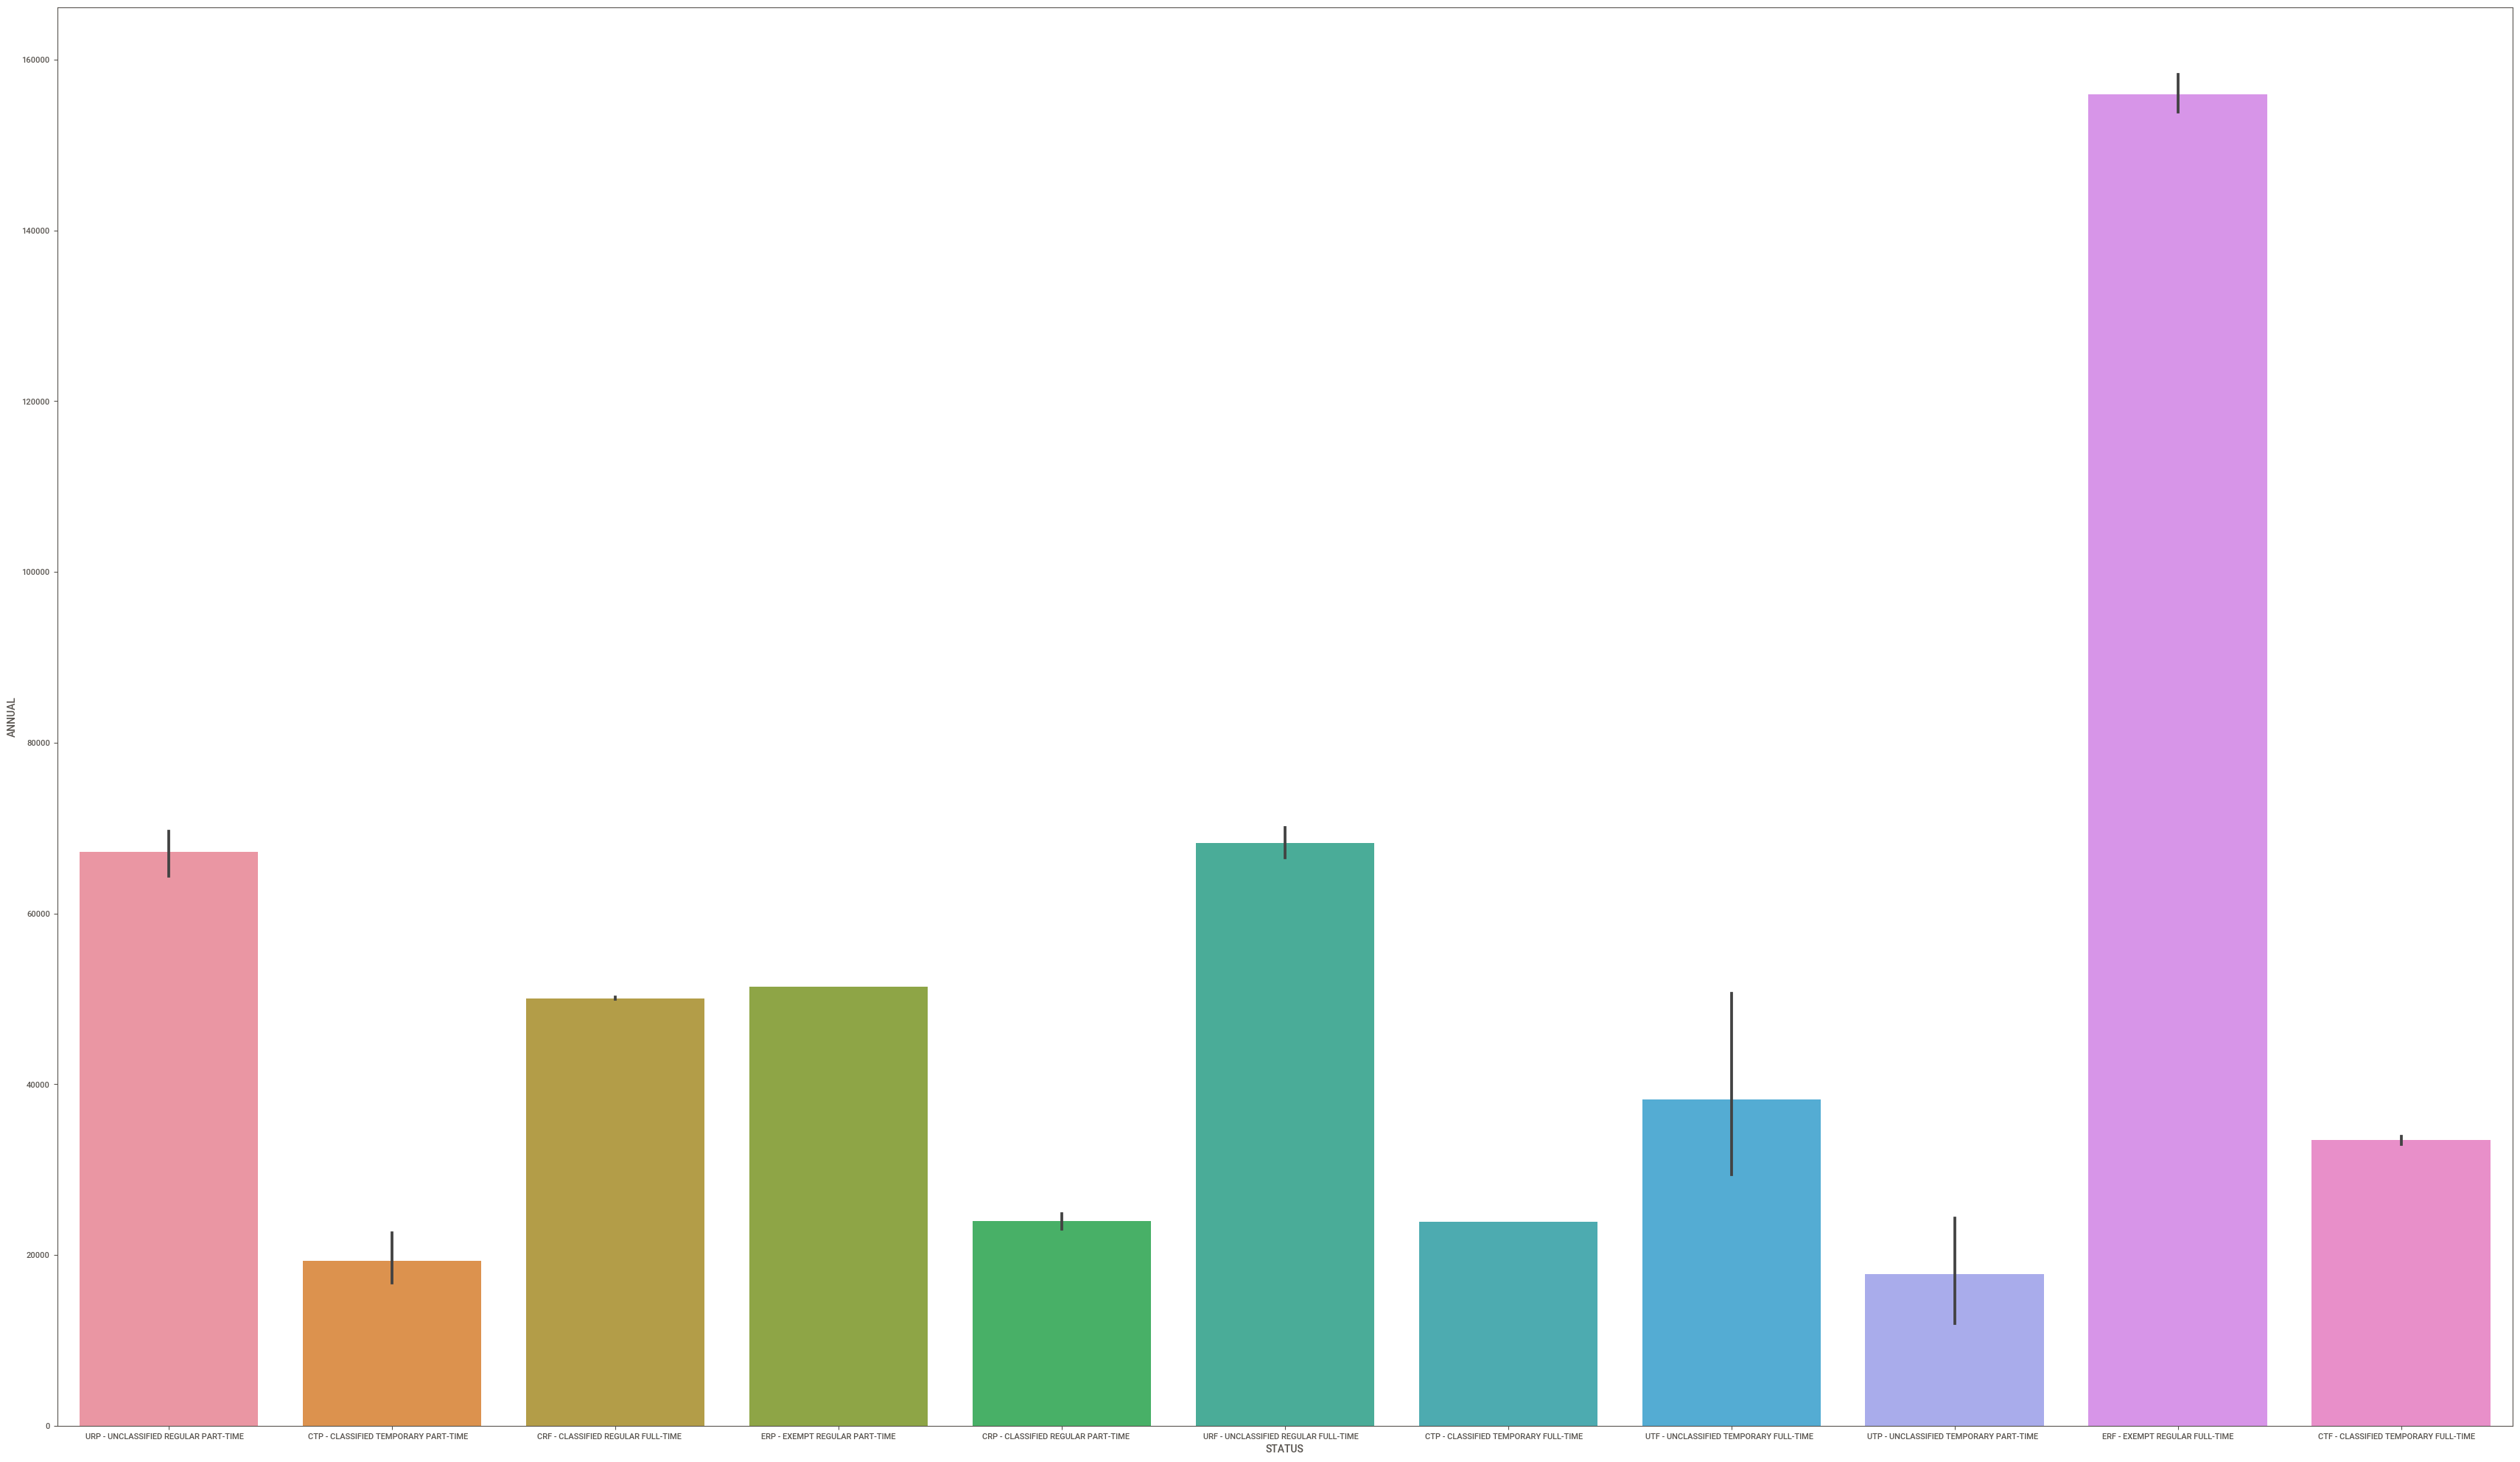

In [24]:
# Categorical Columns

# Relation between ANNUAL and AGENCY NAME
plt.figure(figsize=(12,38))
sns.barplot(data=df,x='ANNUAL',y='AGENCY NAME')
plt.show()

# Relation between ANNUAL and ETHNICITY
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='ETHNICITY',y='ANNUAL')
plt.show()

# Relation between ANNUAL and GENDER
plt.figure(figsize=(7,4))
sns.barplot(data=df,x='GENDER',y='ANNUAL')
plt.show()

# Relation between ANNUAL and STATUS
plt.figure(figsize=(43,25))
sns.barplot(data=df,x='STATUS',y='ANNUAL')
plt.show()

In [25]:
  df.loc[df['ANNUAL'] == 553500]

AGENCY                                        AGENCY NAME  \
83851     542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   

                            LAST NAME                      FIRST NAME MI  \
83851  WILLSON                         JAMES                               

      CLASS CODE                                        CLASS TITLE  \
83851   C542      CHIEF SCIENTIFIC OFFICER                      ...   

             ETHNICITY           GENDER  \
83851  WHITE            MALE              

                                         STATUS EMPLOY DATE  HRLY RATE  \
83851  ERF - EXEMPT REGULAR FULL-TIME              03/01/16        0.0   

       HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER duplicated  \
83851        40.0  46125.0  553500.0        372291        NaN   

       multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
83851                      NaN                    NaN                   NaN   

      hide_from_search  
83851              NaN

***iii).Multivariate Analysis***

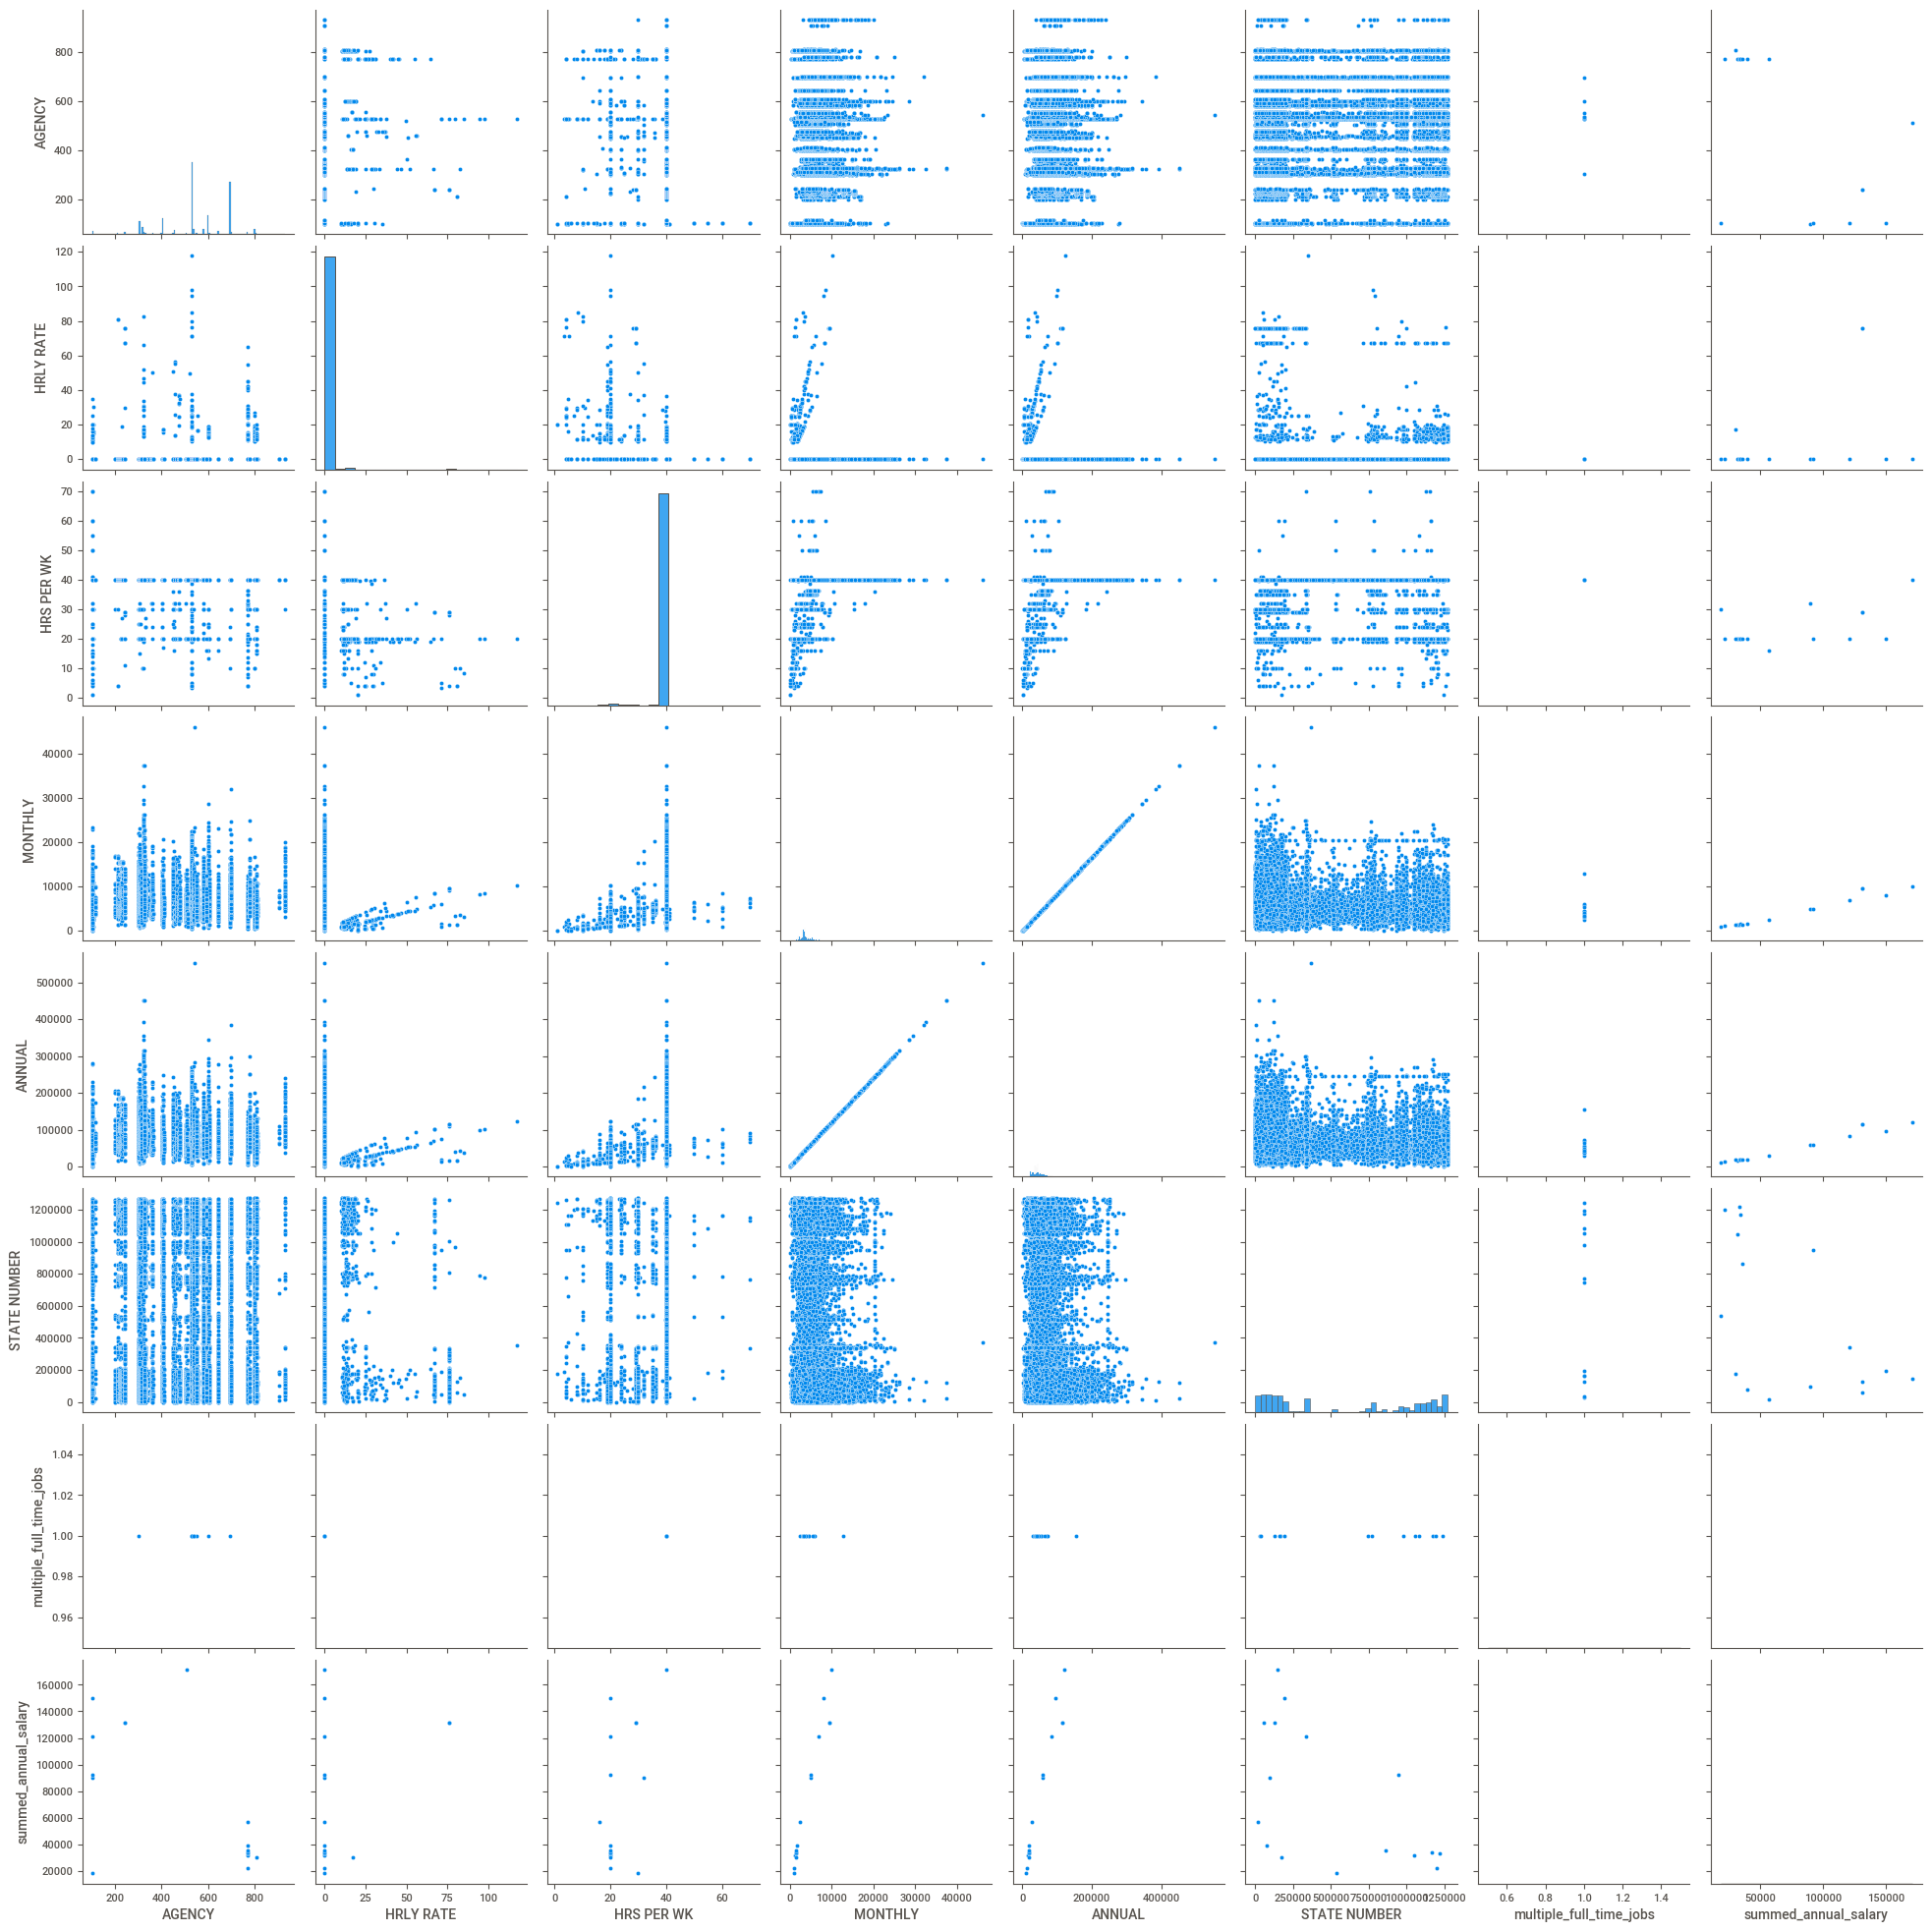

In [26]:
sns.pairplot(num_col)
plt.show()

# 7.Data Preprocessing

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [28]:
data=df.drop(['AGENCY','LAST NAME','FIRST NAME','MI','CLASS CODE','duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1)
data

AGENCY NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS TITLE        ETHNICITY  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 GENDER                                    STATUS EMPLOY DATE  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20   
...                 ...                                       ...         ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME          02/16/12   

        HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  
0        75.96150        29.0  9545.82  114549.84        127717  
1        81.04454         4.0  1404.77   16857.24        127717  
2        75.96150        29.0  9545.82  114549.84         59115  
3        81.04453         4.0  1404.77   16857.24         59115  
4         0.00000        40.0  3284.27   39411.24        165030  
...           ...         ...      ...        ...           ...  
149476    0.00000        40.0  2899.00   34788.00        770781  
149477    0.00000        40.0  5500.00   66000.00        847431  
149478   12.93000        20.0  1120.60   13447.20         34266  
149479    0.00000        40.0  5744.16   68929.92        123490  
149480   11.74000        20.0  1017.46   12209.52        103583  

[149481 rows x 11 columns]

In [29]:
data.isnull().sum()

AGENCY NAME     0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

**i).Handling Enployees Date**

In [30]:
data.sample(5)

AGENCY NAME  \
79545   DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   
105800  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
36943   HEALTH AND HUMAN SERVICES COMMISSION          ...   
125883  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
116141  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                                              CLASS TITLE        ETHNICITY  \
79545   HUMAN SERVICES TECHNICIAN III                 ...  HISPANIC          
105800  CORREC  OFFICER IV                            ...  HISPANIC          
36943   ADMINISTRATIVE ASST II                        ...  HISPANIC          
125883  ADMINISTRATIVE ASST IV                        ...  WHITE             
116141  CORREC  OFFICER IV                            ...  WHITE             

                 GENDER                                    STATUS EMPLOY DATE  \
79545   MALE             CRF - CLASSIFIED REGULAR FULL-TIME          09/11/17   
105800  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          05/21/18   
36943   MALE             CRF - CLASSIFIED REGULAR FULL-TIME          09/01/16   
125883  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          03/03/08   
116141  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          09/04/14   

        HRLY RATE  HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER  
79545         0.0        40.0  2282.48  27389.76        516979  
105800        0.0        40.0  3284.27  39411.24       1122817  
36943         0.0        40.0  2479.73  29756.76        310343  
125883        0.0        40.0  3088.48  37061.76          5895  
116141        0.0        40.0  3480.77  41769.24        774277

In [31]:

data['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'])

# add a column for Year
data['Year'] = data['EMPLOY DATE'].dt.year

In [32]:
data.sample(3)

AGENCY NAME  \
51877  HEALTH AND HUMAN SERVICES COMMISSION          ...   
1967   COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
2532   GOVERNOR'S OFFICE, TRUSTEE PROGRAMS           ...   

                                             CLASS TITLE        ETHNICITY  \
51877  INSPECTOR IV                                  ...  HISPANIC          
1967   DISTRICT JUDGE, ACTIVE                        ...  WHITE             
2532   PROGRAM SPECIALIST IV                         ...  HISPANIC          

                GENDER                                    STATUS EMPLOY DATE  \
51877  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2017-09-01   
1967   MALE             ERF - EXEMPT REGULAR FULL-TIME            2012-03-01   
2532   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2011-03-21   

       HRLY RATE  HRS PER WK   MONTHLY     ANNUAL  STATE NUMBER  Year  
51877        0.0        40.0   3381.40   40576.80         15036  2017  
1967         0.0        40.0  13912.30  166947.60        170550  2012  
2532         0.0        40.0   5642.34   67708.08         41253  2011

In [33]:
import datetime as dt

data['CURRENT DATE']=dt.datetime.combine(dt.date.today(), dt.datetime.min.time())
data.sample(3)

AGENCY NAME  \
145086  BOARD OF DENTAL EXAMINERS                     ...   
4352    OFFICE OF THE ATTORNEY GENERAL                ...   
119185  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                                              CLASS TITLE        ETHNICITY  \
145086  PROGRAM SPECIALIST II                         ...  WHITE             
4352    PROGRAM SPECIALIST IV                         ...  HISPANIC          
119185  SYSTEMS SUPPORT SPECIALIST III                ...  WHITE             

                 GENDER                                    STATUS EMPLOY DATE  \
145086  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2014-01-06   
4352    FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        1999-05-01   
119185  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1996-08-26   

        HRLY RATE  HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER  Year  \
145086        0.0        40.0  3944.28  47331.36        515896  2014   
4352          0.0        40.0  4428.00  53136.00        103122  1999   
119185        0.0        40.0  3255.32  39063.84         59343  1996   

       CURRENT DATE  
145086   2024-09-10  
4352     2024-09-10  
119185   2024-09-10

In [34]:
# We are subtracting Current year with EMPLOY DATE and applying it to lambda function to calculate years for each record.

data['YEARS']=((data['CURRENT DATE'])-(data['EMPLOY DATE'])).apply(lambda x: str(x).split(' ')[0]).apply(lambda x: int(x)/365)
data.sample(3)

AGENCY NAME  \
107707  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
31303   TEXAS FUNERAL SERVICE COMMISSION              ...   
89798   TEXAS DEPARTMENT OF TRANSPORTATION            ...   

                                              CLASS TITLE        ETHNICITY  \
107707  CORREC  OFFICER IV                            ...  BLACK             
31303   LICENSE AND PERMIT SPEC IV                    ...  WHITE             
89798   PORTFOLIO PROJECT MANAGER I                   ...  WHITE             

                 GENDER                                    STATUS EMPLOY DATE  \
107707  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2019-10-01   
31303   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2009-12-01   
89798   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        1992-06-01   

        HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  Year  \
107707        0.0        40.0  3284.27   39411.24       1220909  2019   
31303         0.0        40.0  4708.34   56500.08         25672  2009   
89798         0.0        40.0  9165.00  109980.00        200846  1992   

       CURRENT DATE      YEARS  
107707   2024-09-10   4.947945  
31303    2024-09-10  14.786301  
89798    2024-09-10  32.298630

In [35]:
data.YEARS.max()

49.06027397260274

In [36]:
data.YEARS.min() 

-49.032876712328765

In [37]:
neg= data.loc[data['YEARS']<0]
neg

AGENCY NAME  \
20904   DEPARTMENT OF PUBLIC SAFETY                   ...   
88771   TEXAS DEPARTMENT OF TRANSPORTATION            ...   
92736   TEXAS DEPARTMENT OF TRANSPORTATION            ...   
116978  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
141891  HOUSE OF REPRESENTATIVES                      ...   
142425  HOUSE OF REPRESENTATIVES                      ...   
148921  SOIL AND WATER CONSERVATION BOARD             ...   

                                              CLASS TITLE        ETHNICITY  \
20904   SERGEANT, DPS                                 ...  WHITE             
88771   ADMINISTRATIVE ASST II                        ...  WHITE             
92736   PROGRAM SPECIALIST III                        ...  WHITE             
116978  AGRICULTURE SPEC V                            ...  WHITE             
141891  ELECTED OFFICIAL                              ...  WHITE             
142425  ELECTED OFFICIAL                              ...  BLACK             
148921  PROGRAM SPECIALIST VII                        ...  WHITE             

                 GENDER                                    STATUS EMPLOY DATE  \
20904   MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2071-10-06   
88771   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2072-08-01   
92736   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2073-09-10   
116978  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2069-07-14   
141891  MALE             URF - UNCLASSIFIED REGULAR FULL-TIME      2069-01-14   
142425  FEMALE           URF - UNCLASSIFIED REGULAR FULL-TIME      2073-01-09   
148921  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2068-12-01   

        HRLY RATE  HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER  Year  \
20904         0.0        40.0  7207.91  86494.92        171968  2071   
88771         0.0        40.0  3388.44  40661.28        100209  2072   
92736         0.0        40.0  5733.00  68796.00        180353  2073   
116978        0.0        40.0  4033.74  48404.88         68427  2069   
141891        0.0        40.0   600.00   7200.00        116511  2069   
142425        0.0        40.0   600.00   7200.00          6963  2073   
148921        0.0        40.0  7658.41  91900.92         96871  2068   

       CURRENT DATE      YEARS  
20904    2024-09-10 -47.101370  
88771    2024-09-10 -47.923288  
92736    2024-09-10 -49.032877  
116978   2024-09-10 -44.871233  
141891   2024-09-10 -44.375342  
142425   2024-09-10 -48.364384  
148921   2024-09-10 -44.254795

In [38]:
# Years are not goes to negetive so drop negative years.

data.drop(neg.index,inplace=True)

In [39]:
data.sample(3)

AGENCY NAME  \
111067  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
74963   DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   
76263   DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   

                                              CLASS TITLE        ETHNICITY  \
111067  CORREC  OFFICER IV                            ...  HISPANIC          
74963   CHILD PROTECTIVE SVCS SPEC III                ...  HISPANIC          
76263   CHILD PROTECTIVE SVCS SPEC I                  ...  BLACK             

                 GENDER                                    STATUS EMPLOY DATE  \
111067  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2018-11-26   
74963   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2018-05-21   
76263   MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2020-01-06   

        HRLY RATE  HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER  Year  \
111067        0.0        40.0  3284.27  39411.24        855997  2018   
74963         0.0        40.0  4770.79  57249.48       1122031  2018   
76263         0.0        40.0  3816.65  45799.80       1212865  2020   

       CURRENT DATE     YEARS  
111067   2024-09-10  5.794521  
74963    2024-09-10  6.312329  
76263    2024-09-10  4.682192

In [40]:
data.drop(['EMPLOY DATE','Year','CURRENT DATE'],inplace=True,axis=1)

In [41]:
data.sample(5)

AGENCY NAME  \
77611  DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   
54356  HEALTH AND HUMAN SERVICES COMMISSION          ...   
9005   COMPTROLLER OF PUBLIC ACCOUNTS                ...   
23800  DEPARTMENT OF PUBLIC SAFETY                   ...   
77484  DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   

                                             CLASS TITLE        ETHNICITY  \
77611  CHILD PROTECTIVE SVCS SPEC I                  ...  OTHER             
54356  DIRECT SUPPORT PROF IV                        ...  WHITE             
9005   ACCTS EXAM IV                                 ...  WHITE             
23800  SERGEANT, DPS                                 ...  WHITE             
77484  CHILD PROTECTIVE SVCS SPEC V                  ...  HISPANIC          

                GENDER                                    STATUS  HRLY RATE  \
77611  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME              0.0   
54356  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME              0.0   
9005   MALE             CRF - CLASSIFIED REGULAR FULL-TIME              0.0   
23800  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME              0.0   
77484  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME              0.0   

       HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER      YEARS  
77611        40.0  3816.65  45799.80       1261386   4.394521  
54356        40.0  3056.35  36676.20        357649   7.030137  
9005         40.0  4744.98  56939.76        764415  10.079452  
23800        40.0  6469.91  77638.92         74545  13.794521  
77484        40.0  4983.54  59802.48         86769  17.956164

In [42]:
# Featch Numerical Columns

numerical = data.select_dtypes(include=['int64','float64'])
numerical.sample(5)

HRLY RATE  HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER      YEARS
79591         0.0        40.0  4409.00  52908.00        204580   5.257534
135215        0.0        40.0  4157.64  49891.68        354106   9.917808
64218         0.0        40.0  3520.33  42243.96         45916  14.520548
116330        0.0        40.0  3720.17  44642.04         44808  23.276712
14955         0.0        40.0  5913.92  70967.04        188885  17.416438

In [43]:
categorical = data.select_dtypes(include=['object'])
categorical.sample(5)

AGENCY NAME  \
112793  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
147993  TEXAS COMMISSION ON ENVIRONMENTAL QUALITY     ...   
7039    COMPTROLLER OF PUBLIC ACCOUNTS                ...   
72391   DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   
37773   HEALTH AND HUMAN SERVICES COMMISSION          ...   

                                              CLASS TITLE        ETHNICITY  \
112793  HR SPEC IV                                    ...  WHITE             
147993  GRANT COORDINATOR II                          ...  BLACK             
7039    MGR V                                         ...  WHITE             
72391   ACCOUNTANT II                                 ...  ASIAN             
37773   TEXAS WORKS ADVISOR II                        ...  BLACK             

                 GENDER                                    STATUS  
112793  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
147993  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
7039    FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
72391   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
37773   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME

**Handling Categorical Data**

In [44]:
# Apply Pandas OneHotEncoading

data = pd.get_dummies(data,columns=['AGENCY NAME','CLASS TITLE','ETHNICITY','GENDER','STATUS'],drop_first=True,dtype=np.int32) 

In [45]:
data.sample(5)

HRLY RATE  HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER      YEARS  \
65307         0.0        40.0  2686.16  32233.92       1085732   6.906849   
48833         0.0        40.0  3126.53  37518.36        760511   5.084932   
63075         0.0        40.0  2112.54  25350.48       1132921   6.082192   
140584        0.0        40.0  6610.25  79323.00         97156  27.380822   
96803         0.0        40.0  3345.14  40141.68         51155  14.271233   

        AGENCY NAME_BOARD OF ARCHITECTURAL EXAMINERS                    \
65307                                                   0                
48833                                                   0                
63075                                                   0                
140584                                                  0                
96803                                                   0                

        AGENCY NAME_BOARD OF CHIROPRACTIC EXAMINERS                     \
65307                                                   0                
48833                                                   0                
63075                                                   0                
140584                                                  0                
96803                                                   0                

        AGENCY NAME_BOARD OF DENTAL EXAMINERS                           \
65307                                                   0                
48833                                                   0                
63075                                                   0                
140584                                                  0                
96803                                                   0                

        AGENCY NAME_BOARD OF EXAMINERS OF PSYCHOLOGISTS                 \
65307                                                   0                
48833                                                   0                
63075                                                   0                
140584                                                  0                
96803                                                   0                

        AGENCY NAME_BOARD OF NURSE EXAMINERS                            \
65307                                                   0                
48833                                                   0                
63075                                                   0                
140584                                                  0                
96803                                                   0                

        AGENCY NAME_BOARD OF PHARMACY                                   \
65307                                                   0                
48833                                                   0                
63075                                                   0                
140584                                                  0                
96803                                                   0                

        AGENCY NAME_BOARD OF PLUMBING EXAMINERS                         \
65307                                                   0                
48833                                                   0                
63075                                                   0                
140584                                                  0                
96803                                                   0                

        AGENCY NAME_BOARD OF PROFESSIONAL GEOSCIENTISTS                 \
65307                                                   0                
48833                                                   0                
63075                                                   0                
140584                                                  0                
96803                                                   0   

In [46]:
data.shape

(149474, 1555)

# 8.Feature Engineering.

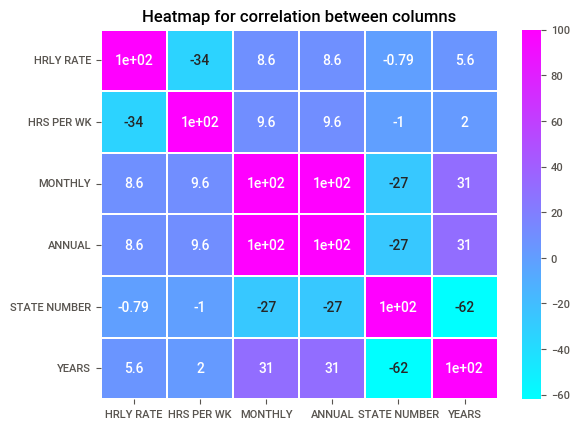

In [47]:
# Checking correlation using heatmap

sns.heatmap(numerical.corr()*100,annot=True,cmap='cool',linewidths=.1)
plt.title("Heatmap for correlation between columns")
plt.show()

In [48]:
data.drop(['MONTHLY'],inplace=True,axis=1)

In [49]:
data.sample(5)

HRLY RATE  HRS PER WK    ANNUAL  STATE NUMBER     YEARS  \
67599         0.0        40.0  49992.00       1250147  4.610959   
125877        0.0        40.0  35045.04        791829  9.457534   
83890         0.0        40.0  34965.00       1195758  5.200000   
74130         0.0        40.0  50379.84        932228  5.161644   
140665        0.0        40.0  39393.84       1183268  5.449315   

        AGENCY NAME_BOARD OF ARCHITECTURAL EXAMINERS                    \
67599                                                   0                
125877                                                  0                
83890                                                   0                
74130                                                   0                
140665                                                  0                

        AGENCY NAME_BOARD OF CHIROPRACTIC EXAMINERS                     \
67599                                                   0                
125877                                                  0                
83890                                                   0                
74130                                                   0                
140665                                                  0                

        AGENCY NAME_BOARD OF DENTAL EXAMINERS                           \
67599                                                   0                
125877                                                  0                
83890                                                   0                
74130                                                   0                
140665                                                  0                

        AGENCY NAME_BOARD OF EXAMINERS OF PSYCHOLOGISTS                 \
67599                                                   0                
125877                                                  0                
83890                                                   0                
74130                                                   0                
140665                                                  0                

        AGENCY NAME_BOARD OF NURSE EXAMINERS                            \
67599                                                   0                
125877                                                  0                
83890                                                   0                
74130                                                   0                
140665                                                  0                

        AGENCY NAME_BOARD OF PHARMACY                                   \
67599                                                   0                
125877                                                  0                
83890                                                   0                
74130                                                   0                
140665                                                  0                

        AGENCY NAME_BOARD OF PLUMBING EXAMINERS                         \
67599                                                   0                
125877                                                  0                
83890                                                   0                
74130                                                   0                
140665                                                  0                

        AGENCY NAME_BOARD OF PROFESSIONAL GEOSCIENTISTS                 \
67599                                                   0                
125877                                                  0                
83890                                                   0                
74130                                                   0                
140665                                                  0                

        AGENCY NAME_BOARD OF PROFESSIONAL LAN

# 9.Split Data into x and y

In [50]:
# Seaprating independent and dependent variable

X = data.drop('ANNUAL',axis=1)
y = data.ANNUAL

In [51]:
X.sample(5)

HRLY RATE  HRS PER WK  STATE NUMBER      YEARS  \
93026        0.0        40.0        189568  17.819178   
52519        0.0        40.0       1118120   4.624658   
73306        0.0        40.0        778720  10.284932   
87621        0.0        40.0        136719  19.641096   
34567        0.0        40.0        170430   6.906849   

       AGENCY NAME_BOARD OF ARCHITECTURAL EXAMINERS                    \
93026                                                  0                
52519                                                  0                
73306                                                  0                
87621                                                  0                
34567                                                  0                

       AGENCY NAME_BOARD OF CHIROPRACTIC EXAMINERS                     \
93026                                                  0                
52519                                                  0                
73306                                                  0                
87621                                                  0                
34567                                                  0                

       AGENCY NAME_BOARD OF DENTAL EXAMINERS                           \
93026                                                  0                
52519                                                  0                
73306                                                  0                
87621                                                  0                
34567                                                  0                

       AGENCY NAME_BOARD OF EXAMINERS OF PSYCHOLOGISTS                 \
93026                                                  0                
52519                                                  0                
73306                                                  0                
87621                                                  0                
34567                                                  0                

       AGENCY NAME_BOARD OF NURSE EXAMINERS                            \
93026                                                  0                
52519                                                  0                
73306                                                  0                
87621                                                  0                
34567                                                  0                

       AGENCY NAME_BOARD OF PHARMACY                                   \
93026                                                  0                
52519                                                  0                
73306                                                  0                
87621                                                  0                
34567                                                  0                

       AGENCY NAME_BOARD OF PLUMBING EXAMINERS                         \
93026                                                  0                
52519                                                  0                
73306                                                  0                
87621                                                  0                
34567                                                  0                

       AGENCY NAME_BOARD OF PROFESSIONAL GEOSCIENTISTS                 \
93026                                                  0                
52519                                                  0                
73306                                                  0                
87621                                                  0                
34567                                                  0                

       AGENCY NAME_BOARD OF PROFESSIONAL LAND SURVEYING                \
93026                                                  0                
52519 

In [52]:
y.sample(5)

99238    29319.96
66024    47951.40
54752    34556.52
38661    24375.48
14116    66466.20
Name: ANNUAL, dtype: float64

# 10.Split data for trainning and testing

In [53]:
## preparing training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112105, 1553), (37369, 1553), (112105,), (37369,))

# 11.Model Building And Evaluation

**Linear Regression**

In [55]:
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_pred = LR.predict(X_train) #y_predict is the model predicted output

In [56]:
y_train

92910     54776.76
141179    72612.96
118837    44642.04
95228     61627.32
44104     58500.00
            ...   
34878     22689.84
147564    57183.24
75972     42370.80
131654    44126.16
104155    49484.76
Name: ANNUAL, Length: 112105, dtype: float64

In [57]:
y_pred

array([56024.05048953, 67473.35346696, 44183.79236927, ...,
       42462.51019318, 50733.65728084, 54575.02008489])

In [58]:
r2score=r2_score(y_train,y_pred)
r2score

0.9484736615945788

In [59]:
X_test.shape

(37369, 1553)

In [60]:
adjusted_r2 = 1-(1-0.94)*(37369-1)/(37369-1553-1)
adjusted_r2


0.9373982968030155

**Decision Tree**

In [61]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [62]:
r2score=r2_score(y_test,predictions)

In [63]:
r2score

0.828484828860488

In [64]:
X_test.shape

(37369, 1553)

In [65]:
adjusted_r2 = 1-(1-0.828)*(37369-1)/(37369-1553-1)
adjusted_r2

0.8205417841686444

**Random Forest**

In [66]:
regressor=RandomForestRegressor(n_estimators = 50,random_state = 42)
regressor.fit(X_train, y_train)
predictions = model.predict(X_test)

In [67]:
y_pred=regressor.predict(X_test)

In [68]:
r2score=r2_score(y_test,y_pred)

In [69]:
r2score

0.8750672216011234

In [75]:
adjusted_r2 = 1-(1-0.875)*(37369-1)/(37369-1553-1)
adjusted_r2

0.8695797850062823

**KNN**

In [76]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test)

In [72]:
r2score=r2_score(y_test,pred)

In [73]:
r2score

0.03790279054441903

In [74]:
adjusted_r2 = 1-(1-0.03)*(37369-1)/(37369-1553-1)
adjusted_r2

-0.012060868351249532

**Task 3**

In [77]:
df

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY DATE  HRLY RATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   
...                                          ...         ...        ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17    0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15    0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89    0.00000   
149480  CRP - CLASSIFIED REGULAR PA

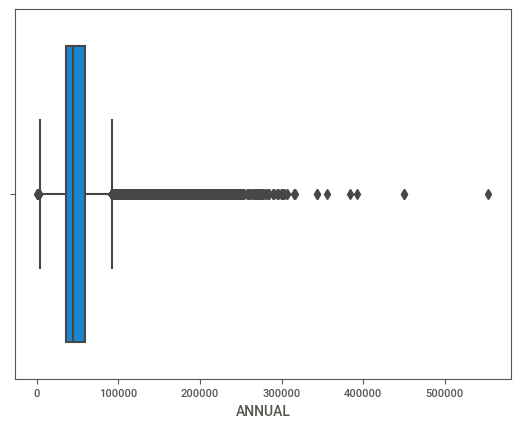

In [79]:
sns.boxplot(x='ANNUAL',data=df)
plt.show()

In [91]:
IQR= stats.iqr(df.ANNUAL,interpolation='midpoint')
IQR

22151.64

In [92]:
Q1= df.ANNUAL.quantile(0.25)
Q3= df.ANNUAL.quantile(0.75)
print(Q1)
print(Q3)

36238.08
58389.72


In [93]:
low_limit= Q1- 1.5*IQR
upp_limit= Q3+ 1.5*IQR

print("Upper limit is:",upp_limit)
print("Lower limit is:",low_limit)

Upper limit is: 91617.18
Lower limit is: 3010.6200000000026


In [95]:
lower_range=df.loc[df['ANNUAL']<low_limit]
lower_range

AGENCY                                        AGENCY NAME  \
141394     101  SENATE                                        ...   
141415     101  SENATE                                        ...   
141808     102  HOUSE OF REPRESENTATIVES                      ...   
141809     102  HOUSE OF REPRESENTATIVES                      ...   
141897     102  HOUSE OF REPRESENTATIVES                      ...   
141901     102  HOUSE OF REPRESENTATIVES                      ...   
142033     102  HOUSE OF REPRESENTATIVES                      ...   
142067     102  HOUSE OF REPRESENTATIVES                      ...   
142114     102  HOUSE OF REPRESENTATIVES                      ...   
142205     102  HOUSE OF REPRESENTATIVES                      ...   
142282     102  HOUSE OF REPRESENTATIVES                      ...   
142311     102  HOUSE OF REPRESENTATIVES                      ...   
142316     102  HOUSE OF REPRESENTATIVES                      ...   

                             LAST NAME                      FIRST NAME MI  \
141394  EDMONDSON                       DOUGLAS                             
141415  FONTENOT                        RACHEAL                         D   
141808  BERNAL                          JESUS                           R   
141809  BHALLA                          RACHEL                          C   
141897  CRUZ JR                         PHILLIP                             
141901  CUTBIRTH                        JOE                             H   
142033  HARRIS                          KATHARINE                       T   
142067  HOUSTON                         DONTE                           D   
142114  KOENIG                          REID                            A   
142205  MITCHELL                        JESSICA                         B   
142282  PETERSON                        BREELY                          K   
142311  REID                            MASON                           H   
142316  REYES                           IRMA                            M   

       CLASS CODE                                        CLASS TITLE  \
141394   7103      LEG. SERVICE/MAINTENANCE                      ...   
141415   7103      LEG. SERVICE/MAINTENANCE                      ...   
141808   7110      ELECTED OFFICIALS STAFF                       ...   
141809   7110      ELECTED OFFICIALS STAFF                       ...   
141897   7110      ELECTED OFFICIALS STAFF                       ...   
141901   7110      ELECTED OFFICIALS STAFF                       ...   
142033   7110      ELECTED OFFICIALS STAFF                       ...   
142067   7110      ELECTED OFFICIALS STAFF                       ...   
142114   7110      ELECTED OFFICIALS STAFF                       ...   
142205   7110      ELECTED OFFICIALS STAFF                       ...   
142282   7110      ELECTED OFFICIALS STAFF                       ...   
142311   7110      ELECTED OFFICIALS STAFF                       ...   
142316   7110      ELECTED OFFICIALS STAFF                       ...   

              ETHNICITY           GENDER  \
141394  WHITE            MALE              
141415  OTHER            FEMALE            
141808  HISPANIC         MALE              
141809  WHITE            FEMALE            
141897  HISPANIC         MALE              
141901  WHITE            MALE              
142033  WHITE            FEMALE            
142067  BLACK            MALE              
142114  WHITE            MALE              
142205  WHITE            FEMALE            
142282  WHITE            FEMALE            
142311  WHITE            MALE              
142316  HISPANIC         FEMALE            

                                          STATUS EMPLOY DATE  HRLY RATE  \
141394  UTP - UNCLASSIFIED TEMPORARY PART-TIME      02/03/05       20.0   
141415  UTP - UNCLASSIFIED TEMPORARY PART-TIME      12/04/19       20.0   
141808  URP - UNCLASSIFIED REGULAR PART-TIME        04/12/17        0.0   
141809  URP - UNCLASSIFIED REGULAR P

In [94]:
upper_range=df.loc[df['ANNUAL']>upp_limit]
upper_range

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
5          302  OFFICE OF THE ATTORNEY GENERAL                ...   
7          510  TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL     ...   
36         101  SENATE                                        ...   
...        ...                                                ...   
149374     809  STATE PRESERVATION BOARD                      ...   
149393     809  STATE PRESERVATION BOARD                      ...   
149401     809  STATE PRESERVATION BOARD                      ...   
149415     809  STATE PRESERVATION BOARD                      ...   
149475     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
5       ROGERS                          SHAUNA                              
7       SPINKS                          DARREL                          D   
36      BARNETT                         ANNA                            P   
...                                ...                             ... ..   
149374  KOCH                            MARGARET                        M   
149393  MEDINA                          JOE                                 
149401  NUNN                            CHRISTOPHER                     L   
149415  PROVINE                         CYNTHIA                         R   
149475  WELSH                           RODERICK                        N   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
2        JD25      JUDGE, RETIRED                                ...   
5        1623      DIRECTOR IV                                   ...   
7        1623      DIRECTOR IV                                   ...   
36       7101      LEG. OFFICIAL/ADMINISTRATOR                   ...   
...           ...                                                ...   
149374   1623      DIRECTOR IV                                   ...   
149393   1603      MGR IV                                        ...   
149401   1602      MGR III                                       ...   
149415   1622      DIRECTOR III                                  ...   
149475   E096      EXECUTIVE DIRECTOR                            ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
2       WHITE            MALE              
5       HISPANIC         FEMALE            
7       WHITE            MALE              
36      WHITE            FEMALE            
...                 ...              ...   
149374  WHITE            FEMALE            
149393  HISPANIC         MALE              
149401  BLACK            MALE              
149415  WHITE            FEMALE            
149475  WHITE            MALE              

                                          STATUS EMPLOY DATE  HRLY RATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88    75.9615   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20    75.9615   
5       CRF - CLASSIFIED REGULAR FULL-TIME          04/01/20     0.0000   
7       CRF - CLASSIFIED REGULAR FULL-TIME          03/01/20     0.0000   
36      URF - UNCLASSIFIED REGULAR FULL-TIME        07/26/10     0.0000   
...                                          ...         ...        ...   
149374  CRF - CLASSIFIED REGULAR FULL-TIME          01/23/13     0.0000   
149393  CRF - CLASSIFIED REGULAR FULL-TIME          03/15/04     0.0000   
149401  CRF - CLASSIFIED REGULAR FULL-TIME          10/12/05     0.0000   
149415  CRF - CLASSIFIED REGULAR FULL-TIME          12/02/08     0.0000   
149475  ERF - EXEMPT REGULAR FULL-T

In [96]:
df=pd.concat([lower_range,upper_range])
df

AGENCY                                        AGENCY NAME  \
141394     101  SENATE                                        ...   
141415     101  SENATE                                        ...   
141808     102  HOUSE OF REPRESENTATIVES                      ...   
141809     102  HOUSE OF REPRESENTATIVES                      ...   
141897     102  HOUSE OF REPRESENTATIVES                      ...   
...        ...                                                ...   
149374     809  STATE PRESERVATION BOARD                      ...   
149393     809  STATE PRESERVATION BOARD                      ...   
149401     809  STATE PRESERVATION BOARD                      ...   
149415     809  STATE PRESERVATION BOARD                      ...   
149475     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
141394  EDMONDSON                       DOUGLAS                             
141415  FONTENOT                        RACHEAL                         D   
141808  BERNAL                          JESUS                           R   
141809  BHALLA                          RACHEL                          C   
141897  CRUZ JR                         PHILLIP                             
...                                ...                             ... ..   
149374  KOCH                            MARGARET                        M   
149393  MEDINA                          JOE                                 
149401  NUNN                            CHRISTOPHER                     L   
149415  PROVINE                         CYNTHIA                         R   
149475  WELSH                           RODERICK                        N   

       CLASS CODE                                        CLASS TITLE  \
141394   7103      LEG. SERVICE/MAINTENANCE                      ...   
141415   7103      LEG. SERVICE/MAINTENANCE                      ...   
141808   7110      ELECTED OFFICIALS STAFF                       ...   
141809   7110      ELECTED OFFICIALS STAFF                       ...   
141897   7110      ELECTED OFFICIALS STAFF                       ...   
...           ...                                                ...   
149374   1623      DIRECTOR IV                                   ...   
149393   1603      MGR IV                                        ...   
149401   1602      MGR III                                       ...   
149415   1622      DIRECTOR III                                  ...   
149475   E096      EXECUTIVE DIRECTOR                            ...   

              ETHNICITY           GENDER  \
141394  WHITE            MALE              
141415  OTHER            FEMALE            
141808  HISPANIC         MALE              
141809  WHITE            FEMALE            
141897  HISPANIC         MALE              
...                 ...              ...   
149374  WHITE            FEMALE            
149393  HISPANIC         MALE              
149401  BLACK            MALE              
149415  WHITE            FEMALE            
149475  WHITE            MALE              

                                          STATUS EMPLOY DATE  HRLY RATE  \
141394  UTP - UNCLASSIFIED TEMPORARY PART-TIME      02/03/05       20.0   
141415  UTP - UNCLASSIFIED TEMPORARY PART-TIME      12/04/19       20.0   
141808  URP - UNCLASSIFIED REGULAR PART-TIME        04/12/17        0.0   
141809  URP - UNCLASSIFIED REGULAR PART-TIME        01/08/19        0.0   
141897  URP - UNCLASSIFIED REGULAR PART-TIME        12/01/17        0.0   
...                                          ...         ...        ...   
149374  CRF - CLASSIFIED REGULAR FULL-TIME          01/23/13        0.0   
149393  CRF - CLASSIFIED REGULAR FULL-TIME          03/15/04        0.0   
149401  CRF - CLASSIFIED REGULAR FULL-TIME          10/12/05        0.0   
149415  CRF - CLASSIFIED REGULAR FULL-TIME          12/02/08        0.0   
149475  ERF - EXEMPT REGULAR FULL-T

*****************************************************

In [98]:
df

AGENCY                                        AGENCY NAME  \
141394     101  SENATE                                        ...   
141415     101  SENATE                                        ...   
141808     102  HOUSE OF REPRESENTATIVES                      ...   
141809     102  HOUSE OF REPRESENTATIVES                      ...   
141897     102  HOUSE OF REPRESENTATIVES                      ...   
...        ...                                                ...   
149374     809  STATE PRESERVATION BOARD                      ...   
149393     809  STATE PRESERVATION BOARD                      ...   
149401     809  STATE PRESERVATION BOARD                      ...   
149415     809  STATE PRESERVATION BOARD                      ...   
149475     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
141394  EDMONDSON                       DOUGLAS                             
141415  FONTENOT                        RACHEAL                         D   
141808  BERNAL                          JESUS                           R   
141809  BHALLA                          RACHEL                          C   
141897  CRUZ JR                         PHILLIP                             
...                                ...                             ... ..   
149374  KOCH                            MARGARET                        M   
149393  MEDINA                          JOE                                 
149401  NUNN                            CHRISTOPHER                     L   
149415  PROVINE                         CYNTHIA                         R   
149475  WELSH                           RODERICK                        N   

       CLASS CODE                                        CLASS TITLE  \
141394   7103      LEG. SERVICE/MAINTENANCE                      ...   
141415   7103      LEG. SERVICE/MAINTENANCE                      ...   
141808   7110      ELECTED OFFICIALS STAFF                       ...   
141809   7110      ELECTED OFFICIALS STAFF                       ...   
141897   7110      ELECTED OFFICIALS STAFF                       ...   
...           ...                                                ...   
149374   1623      DIRECTOR IV                                   ...   
149393   1603      MGR IV                                        ...   
149401   1602      MGR III                                       ...   
149415   1622      DIRECTOR III                                  ...   
149475   E096      EXECUTIVE DIRECTOR                            ...   

              ETHNICITY           GENDER  \
141394  WHITE            MALE              
141415  OTHER            FEMALE            
141808  HISPANIC         MALE              
141809  WHITE            FEMALE            
141897  HISPANIC         MALE              
...                 ...              ...   
149374  WHITE            FEMALE            
149393  HISPANIC         MALE              
149401  BLACK            MALE              
149415  WHITE            FEMALE            
149475  WHITE            MALE              

                                          STATUS EMPLOY DATE  HRLY RATE  \
141394  UTP - UNCLASSIFIED TEMPORARY PART-TIME      02/03/05       20.0   
141415  UTP - UNCLASSIFIED TEMPORARY PART-TIME      12/04/19       20.0   
141808  URP - UNCLASSIFIED REGULAR PART-TIME        04/12/17        0.0   
141809  URP - UNCLASSIFIED REGULAR PART-TIME        01/08/19        0.0   
141897  URP - UNCLASSIFIED REGULAR PART-TIME        12/01/17        0.0   
...                                          ...         ...        ...   
149374  CRF - CLASSIFIED REGULAR FULL-TIME          01/23/13        0.0   
149393  CRF - CLASSIFIED REGULAR FULL-TIME          03/15/04        0.0   
149401  CRF - CLASSIFIED REGULAR FULL-TIME          10/12/05        0.0   
149415  CRF - CLASSIFIED REGULAR FULL-TIME          12/02/08        0.0   
149475  ERF - EXEMPT REGULAR FULL-T

In [100]:
df[['AGENCY NAME','ANNUAL']]

AGENCY NAME     ANNUAL
141394  SENATE                                        ...    1039.92
141415  SENATE                                        ...    1039.92
141808  HOUSE OF REPRESENTATIVES                      ...    1200.00
141809  HOUSE OF REPRESENTATIVES                      ...    2400.00
141897  HOUSE OF REPRESENTATIVES                      ...    1200.00
...                                                   ...        ...
149374  STATE PRESERVATION BOARD                      ...  127000.08
149393  STATE PRESERVATION BOARD                      ...  100300.92
149401  STATE PRESERVATION BOARD                      ...   95000.04
149415  STATE PRESERVATION BOARD                      ...  122257.08
149475  STATE PRESERVATION BOARD                      ...  175989.96

[9031 rows x 2 columns]

In [102]:
df['AGENCY NAME'].value_counts()

AGENCY NAME
TEXAS DEPARTMENT OF TRANSPORTATION                    1257
HEALTH AND HUMAN SERVICES COMMISSION                  1209
COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     1033
DEPARTMENT OF PUBLIC SAFETY                            613
OFFICE OF THE ATTORNEY GENERAL                         516
                                                      ... 
TEXAS COMMISSION ON THE ARTS                             1
STATE COMMISSION ON JUDICIAL CONDUCT                     1
STATE LAW LIBRARY                                        1
TEXAS EMERGENCY SERVICES RETIREMENT SYSTEM               1
BOARD OF PROFESSIONAL GEOSCIENTISTS                      1
Name: count, Length: 111, dtype: int64

In [105]:
 df.loc[df['ANNUAL'] == 553500.0]

AGENCY                                        AGENCY NAME  \
83851     542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   

                            LAST NAME                      FIRST NAME MI  \
83851  WILLSON                         JAMES                               

      CLASS CODE                                        CLASS TITLE  \
83851   C542      CHIEF SCIENTIFIC OFFICER                      ...   

             ETHNICITY           GENDER  \
83851  WHITE            MALE              

                                         STATUS EMPLOY DATE  HRLY RATE  \
83851  ERF - EXEMPT REGULAR FULL-TIME              03/01/16        0.0   

       HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER duplicated  \
83851        40.0  46125.0  553500.0        372291        NaN   

       multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
83851                      NaN                    NaN                   NaN   

      hide_from_search  
83851              NaN

In [106]:
df.loc[df['ANNUAL'] == 600.0]

AGENCY                                        AGENCY NAME  \
142067     102  HOUSE OF REPRESENTATIVES                      ...   

                             LAST NAME                      FIRST NAME MI  \
142067  HOUSTON                         DONTE                           D   

       CLASS CODE                                        CLASS TITLE  \
142067   7110      ELECTED OFFICIALS STAFF                       ...   

              ETHNICITY           GENDER  \
142067  BLACK            MALE              

                                          STATUS EMPLOY DATE  HRLY RATE  \
142067  URP - UNCLASSIFIED REGULAR PART-TIME        05/01/20        0.0   

        HRS PER WK  MONTHLY  ANNUAL  STATE NUMBER duplicated  \
142067        10.0     50.0   600.0        851628        NaN   

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
142067                      NaN                    NaN                   NaN   

       hide_from_search  
142067              NaN

In [107]:
df.ANNUAL.max()

553500.0

In [108]:
df.ANNUAL.min()

600.0

**************************************************

In [109]:
df.head()

AGENCY                                        AGENCY NAME  \
141394     101  SENATE                                        ...   
141415     101  SENATE                                        ...   
141808     102  HOUSE OF REPRESENTATIVES                      ...   
141809     102  HOUSE OF REPRESENTATIVES                      ...   
141897     102  HOUSE OF REPRESENTATIVES                      ...   

                             LAST NAME                      FIRST NAME MI  \
141394  EDMONDSON                       DOUGLAS                             
141415  FONTENOT                        RACHEAL                         D   
141808  BERNAL                          JESUS                           R   
141809  BHALLA                          RACHEL                          C   
141897  CRUZ JR                         PHILLIP                             

       CLASS CODE                                        CLASS TITLE  \
141394   7103      LEG. SERVICE/MAINTENANCE                      ...   
141415   7103      LEG. SERVICE/MAINTENANCE                      ...   
141808   7110      ELECTED OFFICIALS STAFF                       ...   
141809   7110      ELECTED OFFICIALS STAFF                       ...   
141897   7110      ELECTED OFFICIALS STAFF                       ...   

              ETHNICITY           GENDER  \
141394  WHITE            MALE              
141415  OTHER            FEMALE            
141808  HISPANIC         MALE              
141809  WHITE            FEMALE            
141897  HISPANIC         MALE              

                                          STATUS EMPLOY DATE  HRLY RATE  \
141394  UTP - UNCLASSIFIED TEMPORARY PART-TIME      02/03/05       20.0   
141415  UTP - UNCLASSIFIED TEMPORARY PART-TIME      12/04/19       20.0   
141808  URP - UNCLASSIFIED REGULAR PART-TIME        04/12/17        0.0   
141809  URP - UNCLASSIFIED REGULAR PART-TIME        01/08/19        0.0   
141897  URP - UNCLASSIFIED REGULAR PART-TIME        12/01/17        0.0   

        HRS PER WK  MONTHLY   ANNUAL  STATE NUMBER duplicated  \
141394         1.0    86.66  1039.92        176291        NaN   
141415         1.0    86.66  1039.92       1246122        NaN   
141808        10.0   100.00  1200.00        118315        NaN   
141809        10.0   200.00  2400.00       1164537        NaN   
141897        20.0   100.00  1200.00        338420        NaN   

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
141394                      NaN                    NaN                   NaN   
141415                      NaN                    NaN                   NaN   
141808                      NaN                    NaN                   NaN   
141809                      NaN                    NaN                   NaN   
141897                      NaN                    NaN                   NaN   

       hide_from_search  
141394              NaN  
141415              NaN  
141808              NaN  
141809              NaN  
141897              NaN

In [110]:
df[['summed_annual_salary','ANNUAL']]

summed_annual_salary     ANNUAL
141394                   NaN    1039.92
141415                   NaN    1039.92
141808                   NaN    1200.00
141809                   NaN    2400.00
141897                   NaN    1200.00
...                      ...        ...
149374                   NaN  127000.08
149393                   NaN  100300.92
149401                   NaN   95000.04
149415                   NaN  122257.08
149475                   NaN  175989.96

[9031 rows x 2 columns]

In [111]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [112]:
df1=df[['AGENCY NAME','CLASS TITLE','ANNUAL','EMPLOY DATE']]
df1

AGENCY NAME  \
141394  SENATE                                        ...   
141415  SENATE                                        ...   
141808  HOUSE OF REPRESENTATIVES                      ...   
141809  HOUSE OF REPRESENTATIVES                      ...   
141897  HOUSE OF REPRESENTATIVES                      ...   
...                                                   ...   
149374  STATE PRESERVATION BOARD                      ...   
149393  STATE PRESERVATION BOARD                      ...   
149401  STATE PRESERVATION BOARD                      ...   
149415  STATE PRESERVATION BOARD                      ...   
149475  STATE PRESERVATION BOARD                      ...   

                                              CLASS TITLE     ANNUAL  \
141394  LEG. SERVICE/MAINTENANCE                      ...    1039.92   
141415  LEG. SERVICE/MAINTENANCE                      ...    1039.92   
141808  ELECTED OFFICIALS STAFF                       ...    1200.00   
141809  ELECTED OFFICIALS STAFF                       ...    2400.00   
141897  ELECTED OFFICIALS STAFF                       ...    1200.00   
...                                                   ...        ...   
149374  DIRECTOR IV                                   ...  127000.08   
149393  MGR IV                                        ...  100300.92   
149401  MGR III                                       ...   95000.04   
149415  DIRECTOR III                                  ...  122257.08   
149475  EXECUTIVE DIRECTOR                            ...  175989.96   

       EMPLOY DATE  
141394    02/03/05  
141415    12/04/19  
141808    04/12/17  
141809    01/08/19  
141897    12/01/17  
...            ...  
149374    01/23/13  
149393    03/15/04  
149401    10/12/05  
149415    12/02/08  
149475    11/01/16  

[9031 rows x 4 columns]

In [113]:
gb = df1.groupby([ 'AGENCY NAME','CLASS TITLE','EMPLOY DATE'])
d= gb.first()
d

ANNUAL
AGENCY NAME                                        CLASS TITLE                                        EMPLOY DATE           
ALCOHOLIC BEVERAGE COMMISSION                      ADMINISTRATOR, TEXAS A B C                         08/02/17     199999.92
                                                   ATTORNEY IV                                        04/15/10      96600.00
                                                                                                      04/19/08      96600.00
                                                                                                      06/27/05      99000.00
                                                                                                      08/01/19     105000.00
...                                                                                                                      ...
WATER DEVELOPMENT BOARD                            MGR V                                              04/16/18      91992.00
                                                                                                      11/14/16     114410.52
                                                                                                      11/20/00      91839.36
                                                   PROGRAM SPECIALIST VII                             05/21/08      92425.56
                                                   SYSTEMS ANALYST VI                                 01/20/88      96603.48

[7467 rows x 1 columns]

***********************************************

**Model Comparison Report**


**Conclusion**

***By comparing various regression machine learning models,we found that Linear Regression model is best suited for Texas Salary Prediction Dataset, based on the above listed r2score and adjusted_r2 score for respective machine learning models.***

In [116]:
#To dump a final model file

pickle.dump(LinearRegression,open('TexSalPred.pkl','wb'))